In [1]:
import pandas as pd

from fluxo.dados import Dados
from fluxo.carga_dados import CargaDados
from fluxo.limpeza_dados import LimpezaDados
from fluxo.preprocessamento import Preprocessamento
from fluxo.extracao_caracteristicas import ExtracaoCaracteristicas
from fluxo.treinamento import Treinamento
from fluxo.classificador import Classificador

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
pd.set_option('max_colwidth', 180)

## Carga de Dados

In [3]:
dados = Dados()

In [4]:
cg = CargaDados()
cg.executar(dados)

22:17:33 - Carregando dados de segmentos...
22:17:34 - 206488 registros carregados.


## Limpeza de Dados

In [5]:
lp = LimpezaDados(dados)
lp.executar(dados, 'SC', reclassificar_nao_identificados=False)

22:17:34 - (Re)Carregando segmentos originais...
22:17:34 - Removendo segmentos nulos...
22:17:34 - 1900 segmentos nulos excluídos.
22:17:34 - Restaram 204588 segmentos não nulos.
22:17:34 - Removendo todos os segmentos do tipo Anexo...
22:17:34 - 5771 segmentos do tipo Anexo excluídos.
22:17:34 - Determinando tipos de segmento (labels) para atos do tipo SC...
22:17:34 - Tipos de segmento para atos SC: ['Ementa', 'Fecho', 'Não Identificado']
22:17:34 - Excluindo segmentos dos atos que não são SC...
22:17:34 - 188070 segmentos de atos não SC excluídos.
22:17:34 - Restaram 10747 segmentos de atos SC.
22:17:34 - Removendo segmentos não representativos para o tipo SC...
22:17:34 - 100 segmentos não representativos excluídos.
22:17:34 - Restaram 10647 segmentos representativos.
22:17:34 - Removendo tags HTML...
22:17:34 - Removendo caracteres de escape HTML...
22:17:34 - Limpeza de dados concluída.


## Preprocessamento

In [6]:
pp = Preprocessamento()
pp.executar(dados)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/91872936504/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
22:17:34 - Convertendo caracteres para minúsculo...
22:17:34 - Removendo pontuação...
22:17:34 - Realizando tokenização...
22:17:35 - Removendo stopwords...
22:17:36 - Removendo tokens menores que 2 caracteres...
22:17:36 - Reconstruindo texto a partir dos tokens...
22:17:36 - Preprocessamento concluído.


## Extração de Características

In [7]:
ec = ExtracaoCaracteristicas(dados)
ec.executar(dados)

22:17:36 - Executando vetorização TF-IDF...
22:17:38 - Executando vetorização TF-IDF para Cross-Validation...
22:17:39 - Extração de características concluída.


## Treinamento e Teste

In [8]:
t = Treinamento()

In [9]:
# Linear SVC (SVM)
estimadorSVC = OneVsRestClassifier(LinearSVC(random_state=dados.random_state))
t.adicionar_modelo(Classificador('LinearSVC-1xR', estimadorSVC))

# Multinomial Naive Bayes 
estimadorNB = OneVsRestClassifier(MultinomialNB())
t.adicionar_modelo(Classificador('MultinomialNB-1xR', estimadorNB))

In [10]:
t.treinar_modelos(dados)

22:17:39 - Treinando modelo LinearSVC-1xR...
22:17:39 - Treinamento do modelo LinearSVC-1xR concluído.
22:17:39 - Treinando modelo MultinomialNB-1xR...
22:17:39 - Treinamento do modelo MultinomialNB-1xR concluído.


## Treinamento e Teste com Cross-Validation

In [11]:
t = Treinamento()

In [12]:
# Linear SVC (SVM)
estimadorSVC_CV = OneVsRestClassifier(LinearSVC(random_state=dados.random_state))
t.adicionar_modelo(Classificador('LinearSVC-1xR-CV', estimadorSVC_CV))

# Multinomial Naive Bayes 
estimadorNB_CV = OneVsRestClassifier(MultinomialNB())
t.adicionar_modelo(Classificador('MultinomialNB-1xR-CV', estimadorNB_CV))

In [13]:
t.treinar_modelos(dados, cv=5)

22:17:40 - Treinando modelo LinearSVC-1xR-CV com cross-validation...
22:17:41 - Treinamento do modelo LinearSVC-1xR-CV com cross-validation concluído.
22:17:41 - Treinando modelo MultinomialNB-1xR-CV com cross-validation...
22:17:42 - Treinamento do modelo MultinomialNB-1xR-CV com cross-validation concluído.


## Apresentação de Resultados

In [14]:
resultado = pd.DataFrame(dados.metricas)
resultado.transpose()

,acuracia,precisao,revocacao,f1
LinearSVC-1xR,0.9906,0.9933,0.9872,0.9902
MultinomialNB-1xR,0.8291,0.9043,0.8088,0.8278
LinearSVC-1xR-CV,0.9780,0.9860,0.9619,0.9730
MultinomialNB-1xR-CV,0.8129,0.8507,0.7950,0.7968


In [15]:
#print(resultado.transpose().to_latex())

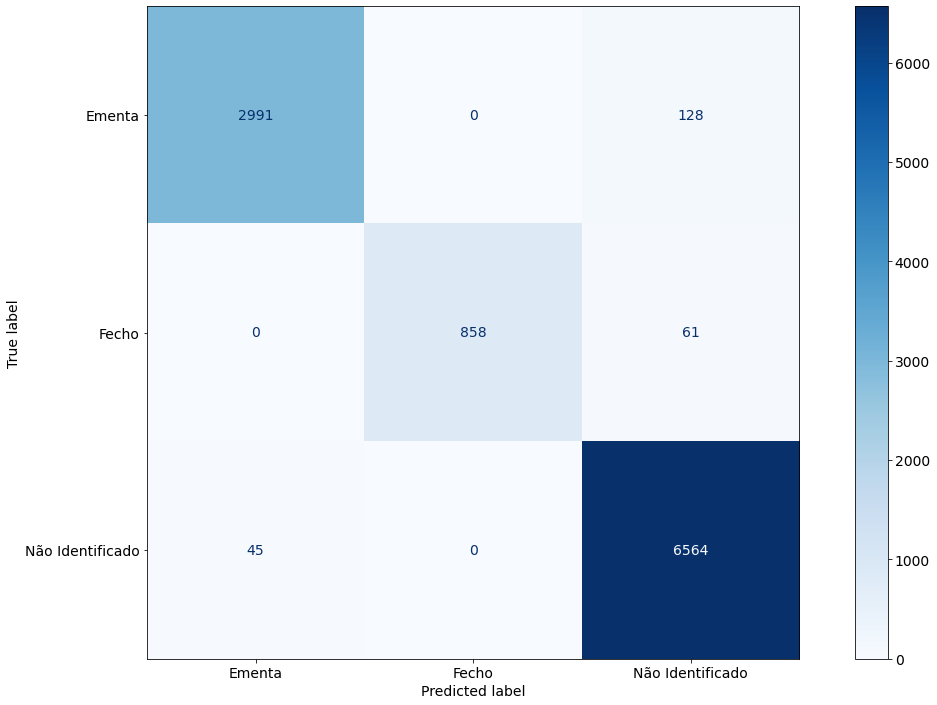

In [16]:
clf = Classificador('LinearSVC-1xR-CV', estimadorSVC_CV)
clf.treinar_com_cv(dados, cv=5)
clf.plotar_matriz_confusao(dados)